<a href="https://colab.research.google.com/github/rokeya160210/Assignment1/blob/main/Assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd

In [12]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Machine Learning/Weight Price.csv', sep= ',')


In [13]:
df.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [14]:
x = df['Weight']
y = df['Price']

In [15]:
import numpy as np

In [16]:
mean_x = x.mean()
mean_y = y.mean()

m = np.sum((x - mean_x) * (y - mean_y)) / np.sum((x - mean_x) ** 2)
c = mean_y - m * mean_x

print(m, c)

# m = ((x - mean_x) * (y - mean_y)).sum() / ((x - mean_x) ** 2).sum()
# c = mean_y - m * mean_x
# print(m, c)

2.620967741935484 35.16129032258065


In [17]:
# y = mx + c , for x = 6.5, y = ?
y_pred = m * 6.5 + c
print(y_pred)

52.197580645161295


In [19]:
# from sklearn import linear_model
# reg = linear_model.LinearRegression()
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['Weight']], df[['Price']])

LinearRegression()

In [20]:
reg.predict([[6.5]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[52.19758065]])

In [21]:
import matplotlib.pyplot as plt

In [22]:
df2 = df.copy()
df2.head()

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50


In [23]:
df2['predicted price'] = reg.predict(df2[['Weight']])
df2.head()

,Weight,Price,predicted price
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097


In [25]:
df2['residual'] = df2['Price'] - df2['predicted price']
df2.head()

,Weight,Price,predicted price,residual
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


In [27]:
# squared value
reg.score(df[['Weight']], df[['Price']])

0.09412315095348434

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
mse = mean_squared_error(df2[['Price']], df2[['predicted price']])
mae = mean_absolute_error(df2[['Price']], df2[['predicted price']])
print(mse, mae)

167.30990783410135 9.87327188940092


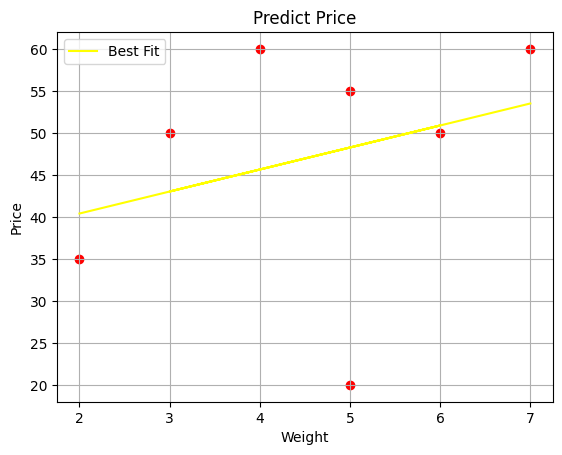

In [31]:
plt.scatter(df2[['Weight']], df2[['Price']], color='red', marker='o')
plt.plot(df2[['Weight']], df2[['predicted price']], color='yellow', label = 'Best Fit')
plt.xlabel('Weight')
plt.ylabel('Price')
plt.title('Predict Price')
plt.grid()
plt.legend()
plt.show()
#